In [2]:
# Importing modules
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from typing import List, Tuple
from collections import Counter
import itertools
import scipy.linalg as la
import random
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [16]:
# Set the default font to be LaTeX compliant.
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = "Computer Modern Roman"
plt.rcParams["text.usetex"] = True

# Set a global font size.
font_size = 11
plt.rcParams["font.size"] = font_size
plt.rcParams["axes.labelsize"] = font_size
plt.rcParams["xtick.labelsize"] = font_size
plt.rcParams["ytick.labelsize"] = font_size
plt.rcParams["legend.fontsize"] = 11

In [22]:
"""
Initial optimized param: [-0.1905552652709773, 0.826794103836818, 0.46070580602994465, 0.6392358203516043, 0.3737297834537639, 1.3863850134758444, 2.250054174817082, 2.2865799821453674, 1.8474350275028557, 2.943849885613736, 2.937138815635332, 5.824687857889466, 4.833659142077338, 4.8321537804203105, 6.298435981295715, 6.031154285939176, 6.258642982220881, 6.323324072273103, 7.965894501049475, 7.936368982793427, 8.048430302004391, 8.199950372072166, 7.828062399597146, 8.292753596778761, 7.8930727990317795, 7.888279549218078, 7.6045272406463695, 9.496205641313086, 9.454127211750453, 10.413402583552637, 0.22569812909520184, 0.48641565909210677, -0.7347959932523311, 0.3952094207349838, 0.2488081170866201, 0.17212333004048272, 0.25385884530710523, 0.370358878031941, -0.05141341152889512, -0.3554979332165541, 0.4413456430694285, 0.9739348511408338, 0.09112184118402498, -0.2195571037111155, -0.24885787557093925, 1.25962475117881, 0.6114251729475919, -0.5335937262795726, 0.04943246137066318, 0.005484971626473549, 1.3104519244293609, 0.4979092978698511, 0.6416458820246012, 0.21745308014166737, -0.4087114989462187, 0.7891607170365741, -0.617307203388439, 0.5508392798207058, 0.2172802973577226, -0.4573394962623111, -0.0050937336789654555, 0.012756993518654275, 0.2433747926836423, -0.09667575788554163, 1.4637433645631337, -0.06289467544555442, 1.4916950042291584, -0.006070576246503756, 0.4972708401155018, 0.3500696628808235, 0.3090441500381426, -0.18398087161628715, 0.25294523690150417, 0.002209167298241761, 0.052993848080851405, 1.5200539716225385, 0.7220192884277282, -1.5778765603713818, 1.2703020062674948, -0.012160203192065448, 1.22148329375021, 0.10129048132597196, -0.24018820905538957, -0.7982944411314258, 1.4568543872815272, 0.00567834863444804, 1.7857179220541524, -0.021236893921148005, 0.238635330266315, -0.6394478049628457, 0.9303530487609107, -0.1917019258512929, 0.07475468891883241, 0.5151191015706935, 0.5026497785303128, 0.10599558689869029, 0.09366670649989686, 0.1803790887157558, 0.7025275733243503, -0.6911746028059659, -1.683518798897433, 0.1514002923688494, -0.12075592266189339, 0.16776553008486178, 0.26517329186774036, -0.22184163626338582, -0.5181566475852698, -0.9551047287095813, 0.3730094838479896, -0.5305471008201765, -0.3505401465066764, -0.3330804497769812, 0.21933758186142588, 0.39863755005643786, -0.33624750990583624, 0.10769758829673662, -1.2440495637283397, 0.4416448082177237, 0.3897962418451306, -1.4539889313580125, 0.26162930124393535, 1.380872341663681, -0.7081306907602561, 1.1992876667274268, 0.4672020284630833, -1.5597296421217155, 1.1394567665208701, -0.17848499359963724, -0.5253351276276002, -0.23315061520778121, 1.2368970931175618, -0.14563883950110412, -0.015738251857892373, 0.17611840813575994, 0.25857093157906397, 1.3664076396513827, 0.9027013210275531, 1.3169468495232761, 0.8824269540274331, 0.021183571150599403, -1.0809655505819549, 0.04940708552054079, -0.5573220990007957, 1.9196539329487328, -1.0755801879074567, -0.02246857801752695, -0.43739432222706726, 1.579055801326704, -0.6034835615150992, 1.6360138823861403]
"""
zne_n1_sample1 = [{'degree': 1, 'value': -7.824438860763138}, {'degree': 2, 'value': -7.990657584106635}, {'degree': 3, 'value': -7.904017573828122}, {'degree': 4, 'value': -7.821263469237616}, {'degree': 5, 'value': -7.8262144464080325}]


"""
Initial opptimized param: [-0.882465094230846, -0.8645509115206389, 1.0860109437351608, 1.6054813659950702, 0.7522686983728198, 2.9709436020938904, 2.7944041033249336, 4.341610711058741, 3.11717978427347, 3.021626655372605, 4.071698459470531, 3.28219643064421, 7.382343633481017, 3.1559241595895857, 7.230817613333765, 3.172005225800061, 7.435970697803745, 4.29826831633019, 7.322838547922418, 5.099416423107285, 5.723686164843414, 5.780364875418835, 4.668046460800838, 8.9180588020338, 8.167528173276517, 8.534717375182035, 8.195220769597734, 9.057554891801345, 8.83973832409068, 9.348483185845945, -0.4018546981531649, -0.43801819832307776, -0.5059778495177807, -2.0862023751646297, 0.7230132131638977, 1.1617336587753504, -2.564865312536094, -1.4358316056700584, -0.18403923856738597, -0.5399269758719245, -0.5947726326399706, -0.6171222619002525, 0.8587750501832484, 0.5033670712495844, -0.8433325751789906, 1.342731842670648, -0.3413428052799698, -0.6133088523076325, -0.40430134563157893, 0.8163401279004997, 0.9018275067782539, 0.504948980743736, 0.43480773816050844, -0.7978597441250942, 0.3577475243942066, 1.2726944266349545, 0.2765551986178938, 0.3438378598711977, 0.007034275173737247, 1.073004201562374, -0.5207985992705431, 1.5918098793658504, 0.23957229467023192, -0.12659621600929416, -1.507666021219773, 0.08815310074283293, -1.0842967717700016, 1.8510910761063004, 0.32017270612286886, 0.14494354360948197, -0.7252400350931563, -1.162507633903739, -0.9799149106579834, 1.7233996172781525, 1.5566198545987533, 0.48068249232855564, -0.21059314799648812, -0.6134418178056319, -0.011309046961177013, 0.11218840027386663, -0.16422368633479661, 0.3008683626598558, 1.213010093975306, -0.062100413496431514, 0.08680614372120268, -0.04784579598158403, 0.04453566296687276, -0.12286168269258413, -0.23690966988864903, -0.1907088057758951, -0.15078502484559933, 0.26990633839012945, -0.8571748349218307, 0.03210619357385409, -0.8940834060497337, -0.2495658419662431, -0.40981028560427757, -0.12399517198454335, -1.4113389153802556, 1.5895882960105985, 0.5322407397512738, -1.1765592970715189, -0.562681563867497, -0.7242301154820292, 0.6731411028772556, 0.6910498219235837, -0.014474586414535046, -0.3664951876931189, -0.979635631075178, -0.8128715367718213, 0.23724931880781924, 0.16317779842078756, -0.6738176709184767, 0.02323509091502205, 0.6034273469288798, 0.9477424245573578, 0.06577859130646897, 0.36212648256981556, 0.01104349390362725, -1.4684617336348942, 0.5160352269971513, -0.05275765125572769, -0.30670955462232663, -0.02153638235676779, -1.3296822878586756, 0.10923359321528262, 1.0873206012013057, 0.5126593415672972, -0.3942360265597979, 1.4791364252612569, -0.4656823510630386, 0.5264090539498946, -0.1427820676064485, 1.442379810561404, 0.5979880706787455, -0.4285830493191033, -0.28814840980085216, -1.8687918938526926, 0.15030389877061756, -0.7524378833013069, 1.189733815521572, 1.2440203652270894, 0.4074217812388962, -0.1803184355258296, 1.8039869820643795, -0.36214975184329706, -0.8585950156372361, 0.1349815535789973, 0.6031996012550936, 0.6315974692637817]
"""
zne_n1_sample2 = [{'degree': 1, 'value': -7.590330319315242}, {'degree': 2, 'value': -7.853626486583993}, {'degree': 3, 'value': -7.776437820063285}, {'degree': 4, 'value': -7.631911280382146}, {'degree': 5, 'value': -7.536361615971538}]

"""
Initial optimized param:  [0.8810378443023272, 3.2432027488176995, -1.7464489227149398, 3.025928394915788, 1.37704355351849, 3.9464360641302485, 2.461897037951229, 2.6694792595230346, 3.3351556721729865, 2.425922721211436, 4.9094898280039745, 5.269355250195088, 5.39725676268804, 4.77163537544283, 4.813093207169645, 4.807940370126196, 4.779287841675169, 5.204777281605053, 5.209300728774963, 6.415941710136795, 6.29243931464094, 7.238128898342907, 7.03830214795612, 8.043292096023785, 8.234695775815503, 7.137873519743199, 8.244389235263935, 8.09006913919833, 10.143515203107501, 10.077684464758244, 0.5563389978402653, 0.07890094122066384, 0.05012765174369656, 0.7133323086712025, -0.3481037085552651, -0.22719401711967852, -0.47253106079440704, 0.7384227425483129, -1.509791833610275, 1.562316966627491, -1.7196027826602365, -1.558711719385527, 1.112609022873296, -0.7754432001829892, 0.8849020666138772, 0.8625098131694622, -0.5724669425039184, -1.541850538288632, 1.0028466594973, 1.5777661770653704, -0.42585152337287674, -0.1994656903234961, -1.976291884079974, 0.06607482201311977, 0.8516117060346567, 0.20734440595775824, 0.6705250985541452, -0.4690874596546756, 0.41246899632110867, 0.24657733166256268, -0.4472647246893409, 0.6843516503557089, -0.24521515992279133, -0.4466778261288879, -0.26493671978511635, 0.6115326501151562, -0.32462896123529666, -0.2002446934637805, 1.2987119618252108, -0.17735763715612013, -0.34812328480503096, 1.0760202535370709, -1.2662247411276732, 0.5964350369137785, 0.034918120141182216, 1.0673452115464719, -0.4031476168558636, -1.1191268561681231, 0.17662307376672293, 0.49697306676884967, 1.0252097858428946, -1.2216464878907796, 0.568608909183067, 2.3909193016103116, -0.441014372173678, -1.0879517227308277, 0.312230064798464, 0.44611853825939785, 0.18976538714763017, -0.884577116275802, -0.8511262232617391, 0.5966622031604649, 0.2988373949531531, -0.5269750739548312, -0.42532616230815745, -1.0618259493122988, -0.6161668263277457, 0.48527056494504434, -1.20352148517947, -0.2227917093472367, 0.7227485904579989, 0.7765119818903296, -0.8536588197758849, -0.9208753521363271, -1.0405152527921457, -0.3193816887403193, -0.6966040809551519, -0.053464060287472526, 0.03849832383504922, -1.2659078993224446, -0.31072729020286094, -2.0719888491632514, -0.3270320587826639, 0.08466206306156875, 0.02034565545781294, 0.07598005552738243, -2.965181258196133, -0.5871755432157296, 0.9034405316673095, -0.11371301045923828, -0.17541561537806652, -0.20564852765453848, 0.6906772341652335, -0.08836091557862272, 0.2814855985669449, 0.5207103731360025, 0.21263189227372856, 0.5596531247805979, 0.7503734151275305, -0.1355040530636924, -0.5944180776809941, -1.2310494724841918, -0.05722692530715202, 1.4260062214779219, 2.286848219475498, -0.3007991968594094, -1.157980435583257, 1.4842483258870653, -0.42603789801415626, -0.4477152292871858, -0.3882462914249121, -0.017803090590447698, 0.4647173313961297, 0.0014343074817486654, 0.5287448956285122, 0.8372662032358453, 1.3821942098827706, 0.7796291868769865, 0.8356753978414101, 0.0007885449993668256]
"""
zne_n1_sample3 = [{'degree': 1, 'value': -7.643380178456389}, {'degree': 2, 'value': -7.856457717029071}, {'degree': 3, 'value': -7.778198651010734}, {'degree': 4, 'value': -7.670602616474287}, {'degree': 5, 'value': -7.630933184544967}]

"""
Initial optimized param:  [-0.10572770090275874, 2.107516102414744, 0.20473667030360174, 3.072303898140876, 1.2243533039082681, 2.690928955733278, 3.3673035190160205, 2.5266900308767144, 4.493698840264657, 1.9962036965206968, 3.8653314842150994, 3.2354796357420628, 3.3443767561146527, 4.661541008837386, 3.6570428933044554, 7.478253862514411, 4.446116430469777, 7.374777199485636, 5.944339086866294, 6.811297282994174, 7.244777100055931, 6.908526679222247, 6.69677055439519, 7.577279829594161, 7.451165369678547, 9.813530512600913, 9.759657584879346, 8.953805033541938, 9.240719602461153, 9.075021690811894, -0.5777532787947016, 0.5173871731732346, 0.7894500950240146, -1.874244861850158, -0.6131598979421901, 0.33335060630184155, 0.7651866730142997, 0.04051305472456692, 0.054266228051976784, 0.455690937610337, -0.28850192566470517, 0.39472440953223964, -0.12668187671247952, 0.3765272321574518, 0.3804251368970216, 0.8945347604135693, 0.7578754701919077, -0.1795466245074687, 0.4261189786990336, 0.04477805759515881, -0.2835622000446977, -0.244974135959296, 0.25891048387029936, 0.329114617185064, -1.3002593128363127, 1.201811897246172, -0.16371362761380778, -0.45419278147625697, -0.49883413817234673, 0.41050122517903026, 0.046394923048283215, -0.19510941592721504, 0.10926315553592962, 0.46594118871673346, 1.376893901172081, 0.3405031952535605, 0.28687617394398485, 0.9332916019416168, -0.289048010772304, 1.0568655222355374, -0.5078743822112161, 0.10292434095404132, -0.221647473253474, -0.31855808824601123, -0.8102400880943521, -0.07934693318086838, 0.1111319126900448, -0.2867843389835783, -0.5483329892131307, -0.09532149330211456, 0.8417756330379513, 0.4797921524048801, -0.771904912182542, -0.7239971133106261, 0.9700699199598971, -0.305949771905098, -1.496807659052277, 0.17665996332454917, 1.177588041780947, 1.013805046306279, 0.32809294741621353, 0.018501193893471976, 0.0007462231557265903, -0.44309566788953586, -1.1151968301639188, 1.1167673019013542, 0.20026636574288834, -0.06538255066693174, 0.8558792013916254, -0.5195414302477352, -0.5323722824972933, 0.12302120320484691, -0.25711770202900974, -0.8356730237475131, 1.1522613878200878, 1.0218783561485885, 0.9821394152605257, 0.11511028940175091, -0.6685195252693544, 0.027230600261273254, -0.07613766481996795, 0.03494343183766694, -1.2948165849416888, 0.1715119666878659, 0.3419349834108774, -0.689815749186361, 0.01571070336629073, -0.14459760853251144, -0.12484761113819016, -0.1469175226971337, -0.8273596263574239, 0.09983078831560023, -0.7595468805087049, 0.42716880341032404, -1.16964193145905, 0.7290481220398283, -0.4725793171267325, 1.0101106084997502, -0.3734108991267753, -0.34183877285543074, 0.2123092446955044, -0.13719777449467685, -0.03261318982956805, 0.3251897534710002, -1.7478541700658217, 0.597005861366637, 0.45941844786186964, -0.027777408433345908, 0.16566368901059514, 1.3823301666056471, -0.039691309380294776, 1.479097255883323, -0.46654205106151614, 0.10570410471262809, 0.2063188932504551, 0.45854369661763794, -0.5370542870897511, 0.8090966882716036, 1.3512976334786935, 0.07994379856212408]
"""
zne_n1_sample4 = [{'degree': 1, 'value': -7.652217485829845}, {'degree': 2, 'value': -7.906590063308366}, {'degree': 3, 'value': -7.831392041618267}, {'degree': 4, 'value': -7.69862098595681}, {'degree': 5, 'value': -7.620299916572267}]

"""
Initial optimized param:  [0.09747496497248141, 0.9390729608931822, 0.819482057536826, 1.9652347809910085, 0.5683497641484944, 2.715164821782805, 2.395610645508512, 2.712563907858427, 5.171747713199911, 3.140056261481164, 4.356241417865319, 3.3804891804083548, 5.167766097680845, 5.022429805115318, 7.2879787941190095, 7.274091236421508, 6.768980281220063, 8.492882344500904, 8.486021047422357, 9.22575795802233, 7.7455706915937395, 7.767947649267914, 7.207001352094566, 8.673321634448902, 8.65861124443352, 9.207871714468562, 8.787977081928332, 8.822383798920017, 8.729950439445595, 8.924676848688273, -0.09450789581454645, 0.5439620564617209, 0.7161376510182995, -0.4028469714914429, -0.40219780926848087, -0.5899709452325471, -0.13523759786583453, 0.18464159948849806, -0.565717424051232, 0.5047345750763496, 0.11189467466565944, -0.5336593903358914, -0.7175674197637779, -1.1129728672886907, -0.8974499574721101, 1.5721918231685337, 0.30347576381194696, -0.4680523618590693, -0.34099961204065726, 0.05051677412209326, 0.9867333536670828, -0.03403516332896031, 0.955572482534813, 0.2063535125865792, -1.244558081439682, -0.146872169261084, 0.48548767061782677, -0.2600569642342921, 0.6055601878407488, -0.01068855080300649, 0.7762320618565419, 0.7590908089442102, 0.6362683123062387, -1.5878354219286608, -0.6031993638743669, -1.1346330214358602, -0.44974110779242754, -0.17825426119418278, 0.09222435050191126, -0.8853921314974842, -0.8042507842926071, -0.1554324410244015, 0.13232880122819707, 0.601551833499544, -0.25776144068813167, -1.147285865672592, 0.9268867542236002, 1.679587491599775, 0.02530410946912673, -0.17793801241336218, -0.07372433368252568, 0.8088096617565815, 0.8838435771228761, -0.8711851595334542, 0.5920635209037313, -0.598697508095195, 0.009403530817458285, 0.010929336662892052, -0.9826055373294205, -1.0810021562353878, -0.8967827280654821, 0.3334735854900829, -0.020581709619430465, -0.017510745681123614, 1.2077145846972306, 1.5209247761583342, 0.38270847738697755, -1.504868147270388, 0.3180401965145496, -0.04221405785676543, 0.3295086423368925, 1.106790750883972, -0.18035273778467986, -0.6289020986519457, 1.6880408639576598, -0.2558224796697036, 0.7881920017237817, -1.5510018145430688, -1.2254017093445932, 1.0473823899837793, 1.6116504620866674, -0.13583026525417397, 0.7384921683900723, 0.9743417678986167, 1.4840656817063442, -0.4481884700639314, -1.3724860790418782, 0.016341578613149096, 1.0178453813927504, 1.4195668257942275, -1.4592061940032703, -1.490796304736817, 0.11134646296627461, -0.39794676854945404, 0.16216812581817702, 0.07644604310925376, 0.5706985586908235, 1.3829679898247478, 0.17672488410760584, 0.21059226557298885, 0.9556343095160454, -1.3479056156000688, -0.6064397563998845, -0.739903942303367, 0.8971121879283888, -0.6402771533345722, -0.9717841006911448, 0.23933795664217306, 0.47236579655136846, 0.6190962164258811, 0.7282197059724905, 0.24149234905624037, 1.780266761297111, -0.2430818451627623, -0.6214913214914979, -1.6236179567454192, -0.43022172350548904, -0.21864404277221908, 0.41368109200442493, 0.7071520779749866]
"""
zne_n1_sample5 = [{'degree': 1, 'value': -7.743327288312685}, {'degree': 2, 'value': -7.941130266996121}, {'degree': 3, 'value': -7.856850189628412}, {'degree': 4, 'value': -7.756854816445455}, {'degree': 5, 'value': -7.7378271861193895}]

"""
Initial optimized param:  [-0.1020024485831077, 0.5918648708481867, 0.9730369645840329, 0.4784127893655111, 1.078052351540965, 0.31555629495120285, 0.6996780816912969, 0.7588401233783131, 1.0622551990122973, 1.2207925863268827, 4.730896795554289, 4.499105168058587, 5.538804675037341, 5.742311175196981, 6.246029854487883, 7.382398195920428, 6.373309501971632, 7.665475958003529, 6.583473555171204, 7.426369103325654, 6.481657804759609, 9.478943433176752, 8.957763696433414, 8.977665849022195, 9.24058512472882, 8.614719286788324, 8.620737361699067, 9.02178908919, 9.160018541921644, 9.476607017376166, 0.26781160741028137, 0.05198435341559797, -0.02196999323758776, -0.05476160318208702, -0.2645160505843911, 0.4202040355917286, 0.328987818493612, -0.49433987223941744, 0.2500999011379501, -0.5963064465707052, -0.5949658749601902, 0.4849336070328505, -1.1142259553428835, 0.49306388478066887, -0.7762035381644437, -0.4978424504851029, -0.15371885109277372, 0.5790466694509954, 0.445278529313464, -1.5153449935886816, 1.123843834500256, 0.1810400463066987, -0.9702785664491197, 0.31436794631697446, -0.28317650249869414, 0.176620804081572, -0.6688056108373395, -1.2620143191173445, 1.2017215328429682, 0.990816263922147, -1.3140080122989672, 0.5261079933350765, 0.5768512108997564, 0.1419395984309084, -0.6031114782080836, -0.8335874017159206, -0.36164214332109224, -0.2040037090843428, 1.5954585160449293, -0.06517556149203468, 2.264026106062985, 0.1017844786644125, 0.24198019820750447, -0.5272047721464803, 0.16747933337263995, -0.00028122941021115934, 0.31800990574393645, 0.10983184759554594, -0.526983858784879, 0.1734040295103806, 0.2260245518450728, -0.7869720382950658, -0.14611577631870765, 1.1007383881077353, 1.261057230083247, -0.11075825386751363, -0.3625806557597177, -0.2940307431802935, 0.15426350949924272, -0.13550368045938216, -0.6188330784154106, -0.2804095230218758, 1.6871754617237902, -0.9771370759320098, -0.6881400922368696, -0.06834836879759121, 0.8550318651994342, 0.34667029809059347, 0.7912784541418155, -0.8884911049552637, -0.364895979278381, 0.39029829195063326, 0.43231147533969044, -0.8834031387302363, 1.3801144264631753, 1.1719380899563572, 0.29584555337185386, 0.9187534753457514, 0.2719943299191941, -1.1108477397561893, 0.34182415452327897, 0.21874502593561795, -0.3430912224940944, -0.03921741137134081, 0.35041460127939655, 0.2901762469461002, 0.27558669025242993, 1.0823566637886821, -0.21711666272568478, 0.04306313191534969, 0.6420120791599853, -0.7314000891756128, 0.3011974206706705, -0.464442205772038, 0.059542172785593095, -0.6623371911735388, 0.2815031414318256, -0.2719115218962334, -0.2427493384600309, -1.6592170118344192, -0.03305298377367563, -0.6929669488147748, -0.0761487799154607, -0.008761333523993055, 0.07970572506221708, 0.26951192602793883, 0.014073336910854495, 1.6730023085268955, -0.0750388073622047, 1.1500993377650135, 1.5200681457788896, 0.8820826122989687, -0.06485625973028987, 0.062708598586901, 0.3783894528276208, 0.35650782157093747, 1.579226865898672, -0.36776633363893785, 0.9858476210593297, 0.32216608849387346]
"""
zne_n1_sample6 = [{'degree': 1, 'value': -7.69286150223043}, {'degree': 2, 'value': -7.866316996183097}, {'degree': 3, 'value': -7.786787317672324}, {'degree': 4, 'value': -7.710231922164628}, {'degree': 5, 'value': -7.72159304211213}]

"""
Initial optimized param:    [-0.3805348661535229, 0.8072630054372736, 2.121706873921751, 1.0935839629924093, 2.3875583708097663, 1.5382976255491623, 3.0189144581384184, 4.73275770558543, 3.517191957157444, 5.081365077660671, 6.295850530868327, 3.8973032713651876, 6.5045192415021615, 4.790207812655259, 7.302726043190439, 5.778686952833402, 5.697847935948155, 6.066852159494112, 6.577245110281996, 7.302566787499512, 6.424040082601056, 8.777224463986363, 7.716006245542889, 8.878840781676798, 7.810924483388386, 8.62429552842654, 7.681884304349167, 8.716744033796544, 8.027309819300832, 8.654874572015585, -0.10362290223813314, 1.0300124393112111, -0.19224256102440992, 0.9653217588365575, 0.346590636435127, 0.41463515218895025, 0.3336922220951133, 0.10630349590100663, -0.47363268214028387, 0.23622721844483766, -0.6008881428326748, -0.9258637415157392, 0.0669054908417285, 0.8659379445642433, 0.4691182580581576, -0.9040442047905548, 0.339845658796155, 0.3511695370272257, -0.42315906660909813, 1.1329354350368583, -0.11636752469274202, 0.06495774753215525, -0.9398095189608108, 0.5414426761492558, -0.8938212593063521, 1.1000894563636066, 0.5120283401765043, 0.41942512140233396, -0.1528929256268134, -0.244250249145031, 0.2873203782749898, -0.17224616635341042, -0.9917878788458233, 0.15669831638717618, -0.9145536094009674, -1.0155579371074683, 0.7095749595762503, 0.2397796369658307, 1.1080710001158165, 0.3179936912522138, -1.1089495443578943, -0.6534012878822089, 0.8474490479519012, 0.6260627038196473, 0.3553411687883711, -0.7206554718942058, -0.5949938128555852, 0.1461366713979795, -0.5362185670361959, 0.16753092335210643, 0.4074181963541204, 0.09663878400039046, 0.07404809847815189, 0.1673541413095305, -0.6621150095634208, -0.508438662611979, -0.11880018320128452, 0.770866502098407, 0.8085387437466729, -0.7876834493346194, 0.593200505314314, 0.43245869373053364, 0.4060687083339642, 1.173089785351, 0.9017297402469329, 0.10855849117571283, 0.005644492911588517, 0.23175649088566835, -0.6598154973618566, -0.08450080198462624, -0.9268369060672212, 0.22000192059366666, 0.09879326806068764, 1.1586378535275421, -0.7702801156673281, -0.13029910466134387, 0.4657035579664306, -0.448680364330619, 0.600236658528672, -0.0056317353121824315, 0.8518772295235655, 0.25049696176797415, 0.939407049762186, -0.1278956907686562, 1.475538510453936, 1.4296238066918499, 0.045045680092275775, 0.7974751882587581, -0.18531609838403518, -0.3897245166258936, -0.06922706556431343, -0.12449115038995105, 0.38195387228272254, -0.22688322174709308, -0.6662818009496025, 0.37349318248619356, 0.9128687962506481, 0.0588906768237082, 0.028463727462804178, 0.8122290958565925, 1.9846539814719926, 0.3494907436141716, 0.39884513651557063, 0.016171867803652692, -0.3461603949799944, -0.6817587809015152, 0.2681394261438835, -0.24315163454921757, 0.6409438600101331, 0.1794375514149461, 0.02501864903074594, 0.24641348241269043, -0.15393326400007978, 0.23093146405937903, -0.7721086970922889, 1.2509207056102756, 0.717596726156119, 1.0654029954118818, -0.453052604354593, 0.21235846024114838]
"""
zne_n1_sample7 = [{'degree': 1, 'value': -7.5809587439866295}, {'degree': 2, 'value': -7.842782597483391}, {'degree': 3, 'value': -7.766112318271095}, {'degree': 4, 'value': -7.627817497222876}, {'degree': 5, 'value': -7.5456344696934}]

"""
Initial optimized param:  [-0.38771939296051805, 0.9250894261935706, 1.6858874375771862, 2.644102056239823, 2.3943163540866927, 2.4451855769267814, 2.9200323044770604, 3.1291438069938793, 2.9699620096466, 4.891990215937898, 4.463729088664933, 5.049780464729964, 4.648895253919609, 4.910458382452227, 5.94042364566588, 4.9942235459028055, 6.593458989291248, 4.292138717674812, 6.62564278588217, 6.5950416964342, 7.232940362839391, 8.557288167196175, 7.944987861878084, 8.49390416910198, 8.406585506848433, 8.573945671782518, 7.885742234470584, 9.10518375270385, 10.236115345131095, 10.200839308228085, 0.41235122358205056, 0.4156054338363038, 0.03234614557711695, 0.023779748197479425, -0.34678292393489324, 1.2298359938761967, 0.7652925560939098, 2.4020558618053474, -0.5273727215959411, 0.8049248244218746, 0.7180580216151214, -0.6546887840086103, 0.8868102009819301, 0.03413418434599863, 1.6351801054756039, 0.18443143637049822, -0.6795978808147212, 1.2041154631217428, 0.3266108893759478, 0.19957716410599727, -0.4352538394856124, -0.09744372996607113, -0.5535488483723496, -0.8120654992918903, 0.34484733068134216, 1.1560966502480632, 0.1823717948446684, -0.5125145116800092, -0.546219508928487, 0.6121351562138767, -0.8281873760822605, -0.5747548058100126, -0.6428512130892435, 1.1708570773804297, 0.08700512675615961, 0.12119276725961843, 0.4844604986543094, 0.023494855788167752, -1.137321294764994, 0.29394790554605166, 1.302638531693236, 1.7503936398328608, 0.27946104855019843, 0.15708482261304862, 1.4670795822401275, 0.529735331544752, -1.2574089574345224, -0.10304584873964921, 2.0288948926022954, -0.015862254602577733, 0.2865689866099987, -0.041847228535847804, -0.056501200950181074, -0.09645607128336565, 0.9199571069151733, 0.6630931108380723, 1.2009363425457198, 0.45106516822940074, 1.2590866046951628, -0.5495111462277412, 0.06663382389827524, -0.19286946075495018, -0.9509850606155048, 0.9311715489128911, -0.7469368884492937, 0.3071970316005203, -0.8448749882785302, 0.5132858600905948, 0.4428483327812849, 1.4473623939458646, 1.2581367297002668, -0.6521632897783857, -0.48301814282395555, -0.9483764120384314, -0.9136472854858155, -0.5247019454458043, 0.2523319665416793, 0.2614996123677043, -0.28753659031460366, -0.9987414914784425, -0.035038844457187704, -0.8041754962382578, 0.08049853859143509, 0.2445885733803519, 0.6336171843627671, 0.8564925828908289, 0.5052866368623289, -0.5938866752497188, -1.5802271820538272, 0.04536030580637252, -0.08499702481214566, 1.1753241999547388, 1.236391193160062, 0.6583706842236918, -0.5480889487620275, -0.36925341520683447, 0.6071712861513727, -0.02460927299902988, -1.8347115727591494, -0.10103526993477716, -0.6756206174614015, 1.1112700887596434, -0.5832486900240854, -0.4371222615670808, 0.7181596174270283, 0.6046361033657237, 0.6443820988400961, 0.08341069039414806, 0.4733113306973886, 0.30990416687752587, 1.714551908108394, 1.1506799661447205, 0.2479743103809881, 0.490589978213386, 0.5416072280447003, -1.3373999689459029, -0.2635636764074873, 1.2296321706576223, 1.344043728861267, 0.44616413790250187]   
"""
zne_n1_sample8 = [{'degree': 1, 'value': -7.683950382143938}, {'degree': 2, 'value': -7.925483426682254}, {'degree': 3, 'value': -7.85205822499345}, {'degree': 4, 'value': -7.731470173709904}, {'degree': 5, 'value': -7.669297753498007}]

"""
Initial optimized param:     [0.46359154633757355, 1.367441088513996, 1.9290326364959045, 1.5087405050305807, 2.253583425588181, 0.1543265076437434, 1.5464423688661522, -0.03662406885993342, 2.518274351535867, 1.4096740235672909, 2.3412802229555134, 2.1487348081323865, 2.4827165701712643, 4.044687245750517, 4.052760530029338, 5.266926804317491, 5.136241187018289, 5.790907932263572, 4.572613791846666, 4.81753528792136, 5.47914517992485, 4.620270666730757, 5.953430905783762, 5.512022681350512, 5.971398396475162, 6.7887292730782445, 6.702136550194086, 8.661419849474466, 8.628536280312263, 9.299501440127449, 0.1173255068103461, -0.6847298373584801, 0.3493253801432852, -0.94084135931886, 0.49593176699825026, 0.09231899829871204, 0.4074027002898825, 1.3689571650556451, -0.18597219058256775, -0.6964390885208708, 0.5023261305166038, -1.3101654805755638, -0.6584236864905575, -0.6575479217892579, -0.4502566889192773, 2.068491225443846, -1.952835177693529, 0.24500571308692648, -0.5283041051190001, -0.27635434746548626, 0.02835624036756952, -0.47370333817452237, -0.4269440090192948, -0.022865145403527302, 0.14042882223913156, 0.045155685585255234, -0.4099983841109142, -0.6337100948459721, -0.3396008705628301, -0.7440736842057224, 0.147325937040266, 0.939517336396259, -0.9527207875382161, 0.15083822428966315, -0.13088009773653567, -0.5013131293491857, 0.4445393152479912, 0.7260504457274586, 0.26215868787393676, 1.4910880575754952, 0.9174065575281514, 0.33136005421818865, 0.9430642656240007, 0.0023296643123312958, 0.9374639177530083, 0.8326942464479477, -0.30941515223181065, 0.3704093972948404, -0.093424009825471, 0.4480372872737708, -0.9200755229805816, -0.17907298101933244, -1.4212764362733985, 0.057672358408184236, 0.6374023368077455, 0.4852281655492772, -0.01766983102622823, 0.12063817412143782, -0.05297309594609382, 0.06979317500617979, 0.043851028338077885, -0.27769840266557316, 0.7247849847495036, 1.0697648660991046, 0.4128421370306996, -0.4744443974938546, 0.12827960428744942, -0.29388891700840075, 0.7952901319239614, -0.7347931808109053, -0.36566540067182696, 0.7218905483203782, 0.4843162204656108, -0.19218395412078113, 0.6389459318655212, -0.6606430108770286, 2.0788338569070244, -0.8313305476671587, -0.44392789106962405, -0.05731041470173684, -0.07650986088789594, 1.8087601296904976, -1.1363340816301817, -0.2900617649015503, 0.09375996212009943, -0.2088159335768881, -0.982608304357105, -0.4162635453214898, 0.36167864867679156, 0.4316161322178146, 0.03166800613949624, -0.48604555341508054, 0.39607176649385173, 0.8553832204687115, 0.26328170769501646, 0.3516890827485722, -0.3510730932696307, -0.27305694536150116, -1.1171014300722024, -0.8575141189332562, -0.7217836375125165, -0.44605450747809916, 0.5727793428451836, -1.1569034610072564, -0.9423377506147045, -0.2658960971563612, -0.6279366650407158, -0.026040148979191356, 0.9447465696634523, 0.07127497992350523, 0.41534326169853236, 1.2701747644681434, 0.24102694405730188, 0.06953937430398524, 0.6672816345478595, -0.07474947114383225, -0.8801535256562341, 1.5131430310616534, 1.5831915959430123, 1.5104456010131684]
"""
zne_n1_sample9 = [{'degree': 1, 'value': -7.709503322060886}, {'degree': 2, 'value': -7.897634095456032}, {'degree': 3, 'value': -7.808859674091051}, {'degree': 4, 'value': -7.705912609891781}, {'degree': 5, 'value': -7.683173945416142}]

"""
Initial optimized param:     [-0.4929777397096545, 1.1754393351186698, 2.504411902893884, 1.498115728851422, 1.9816934395251276, 1.8369552508169944, 2.2838109629993757, 1.8944841958983683, 2.337521879729919, 2.300212263832221, 2.0187240960174333, 2.857011976247422, 3.26486288162812, 3.168249405847217, 3.858931183031316, 3.854633770617287, 5.267262230486288, 5.231179665573414, 6.870524703235069, 6.876727483516612, 6.336165970826414, 6.829318109094797, 6.838508548764557, 7.111445613557114, 7.094880321704825, 8.466714897838873, 8.450773050564536, 9.540928111080385, 9.534849984496292, 9.849433792481586, 0.5465565926025943, 0.525540453027701, -0.37808353274610484, 0.17494990049403256, -0.47412483406940104, 0.7483677826311953, 0.638526202833207, 1.0414036913642573, 0.18763433654317924, -0.10356380198042502, 1.647947083424706, 0.7383512067432919, -0.2465838459907882, -1.229251214724445, 0.17566404551338605, 1.4832632127890468, 0.9252664475975346, 0.2495012965772029, 0.06416093172998842, -1.0121281317513822, -0.4496589616260298, -1.2236472890927068, 0.9632594287708868, 0.03598214464646869, -0.17156885571411762, 0.7633694101626824, 0.19632684604471232, -0.14098267240571186, 0.048481786785219486, -0.6568350435016337, -0.1635538631853428, 0.6029535747554157, -0.5526804524142093, 0.4063010059477733, 0.8675582744595105, 0.637149775459186, -0.15760930023968128, 0.058675989382524954, -0.865871139216705, 0.7227014811617988, 0.11195283836215965, -0.5201795353473874, -0.13957234105020172, 0.13273682903601164, 0.8339898818846462, -1.1552304696616273, 0.12243207228117549, 1.173152940588395, -1.3581514459445054, -0.03903506063999561, -1.0053380910861907, -0.36603403169678395, -0.5748552416573914, -0.46418346593964105, -0.5091180262028311, -0.05951766047804347, 1.447487640172729, -0.11400777743444535, -0.7994654958066162, 0.8027228936012262, -0.34372857795010514, -1.4705159493112687, 0.4656102326971691, -0.03934707160983093, 0.7391692484525888, -0.02683153566939042, 0.4942879564515306, 0.03199791876889271, 0.35430917966932446, -1.948698986269309, 0.3942664007944707, 0.01162495600561031, -0.4663980478720574, -0.009493025708311868, -0.6111538475352408, -0.08278797645084875, -0.9225479841310917, 0.4535538049013734, 1.255193801706149, -0.016739829037714805, -0.4255558581673283, 1.5454915057089411, 0.7700494968341871, 1.5664987815925258, 0.32816419760592563, 0.025323514932215074, 1.3015620113700275, -0.031503255339946114, 0.3786456264049921, 1.9812133189395127, -0.8079363322368606, 0.019167307326982345, -0.17866113842434853, 0.005678079447148491, 0.8728894774038546, 0.19101320932434582, -0.23947543509668945, 0.2868911174993025, -0.4785020527204658, -0.0038669182863578593, 0.540382947600835, -0.000482670316205182, -0.1752934157142043, -0.08508779050210517, 0.14480428920251232, 0.9199522103556343, -0.27285698195793506, 0.017309946893408045, 0.13122490913801974, 0.01678304409598263, 1.8061304227747876, 2.2301357174268075, -0.3132399799420398, -0.5147178972431182, -0.07945475904802847, -0.040575069124919115, 0.6927272289393879, -1.5454521658742266, -0.0513518555542004, -1.58058608269179]
"""
zne_n1_sample10 = [{'degree': 1, 'value': -7.891029864297008}, {'degree': 2, 'value': -8.047481188850345}, {'degree': 3, 'value': -7.9579182496351315}, {'degree': 4, 'value': -7.885052136401225}, {'degree': 5, 'value': -7.912760735549879}]

In [14]:
q7_exact_val = -8.566772233505624
q7_n1_vals = [-6.249319713963574, -6.378881059699827, -6.320611707528765, -6.484837854430937, -6.486638254012322, -6.238774775844604, -6.372804817238724, -6.469236406756191, -6.679134872780676]

In [19]:
q7_n1_mean = np.mean(q7_n1_vals)
q7_n1_std = np.std(q7_n1_vals)

In [11]:
# Aggregate all lists into one
zne_n1_all = [zne_n1_sample1, zne_n1_sample2, zne_n1_sample3, zne_n1_sample4, zne_n1_sample5, zne_n1_sample6, zne_n1_sample7, zne_n1_sample8, zne_n1_sample9, zne_n1_sample10]

# Initialize an empty dictionary to collect values for each degree
degree_values = {}
zne_n1_mean = []
# Process each list
for lst in zne_n1_all:
    for item in lst:
        degree = item['degree']
        value = item['value']
        
        if degree not in degree_values:
            degree_values[degree] = []
        
        degree_values[degree].append(value)
        zne_n1_mean.append(value)

# Mean value at a degree
degree_means = {degree: np.mean(values) for degree, values in degree_values.items()}

print("Mean values at each degree:", degree_means)

Mean values at each degree: {1: -7.680107564788798, 2: -7.8978532482032175, 3: -7.817857090130748, 4: -7.706076152387278, 5: -7.663481728926208}


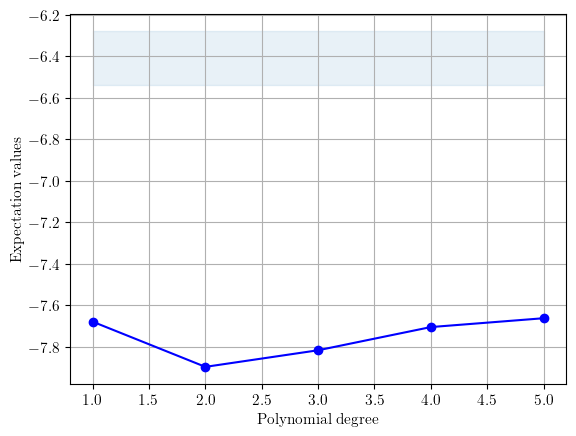

In [21]:
# Separate the keys and values for plotting
degrees = list(degree_means.keys())
mean_values = list(degree_means.values())

# Plotting the graph
plt.plot(degrees, mean_values, marker='o', linestyle='-', color='b')
plt.fill_between(degrees, q7_n1_mean - q7_n1_std, q7_n1_mean + q7_n1_std, color="#1f77b4", alpha = 0.1, label="Standard")
plt.xlabel('Polynomial degree')
plt.ylabel('Expectation values')
plt.grid(True)
plt.show()